<a href="https://www.kaggle.com/code/rythmkumar/notebookc4fe5915da?scriptVersionId=139924277" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing numpy 
import numpy as np
# To load data 
import pandas as pd
import keras
import os

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# Loading image and checking shape

In [4]:
#Loading Image
img=load_img("/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Training/male/0.jpg")

In [5]:
# check the size of the image
img.size

(256, 256)

In [6]:
img_array = img_to_array(img)
print(img_array.dtype)
print(img_array.shape)# Check shape of image

float32
(256, 256, 3)


# Checking another image of dataset

In [7]:
# Loading another 1 image to check shape
#Loading Image
img1=load_img("/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Training/male/3.jpg")

In [8]:
# convert to numpy array
img1_array = img_to_array(img1)
print(img1_array.dtype)# checking datatype of image
print(img1_array.shape)# Checking shape of image

float32
(256, 256, 3)


# Creating CNN model

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=8,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Adding a Flatten layer

In [11]:
model.add(Flatten())

# Summary of CNN

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 16)      4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 8)         1

# Add Fully connected layer 

In [13]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [14]:
#units=There are 2 classes so units equal to 1 and activation function is 'sigmoid'
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [15]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 16)      4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 8)         1

# Using Image data generator to generate data

In [17]:
from keras.preprocessing.image import ImageDataGenerator #precprocessing, augmentation etc

In [18]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [19]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
#flow_from_directory will load the images, augment them batch by batch from the disk to the RAM
train_set = train_datagen.flow_from_directory (
    "/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Training",
    target_size=(256,256),
    batch_size=64,
    class_mode='binary')

Found 72318 images belonging to 2 classes.


# We segregate data into 2 categories to make test data as validation data

In [21]:
test_set = test_datagen.flow_from_directory(
        "/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Validation",target_size=(256,256),
        batch_size=64,
        class_mode='binary')

Found 16813 images belonging to 2 classes.


In [22]:
len(train_set), 72318/64

(1130, 1129.96875)

# Fitting the model

In [23]:
#train_set is a data generator and it can supply infinite batches of images, all of them randomly augmented
model.fit(train_set, #Exclusively we do not need to specify 'y' here
        steps_per_epoch= len(train_set), #No of batches the CNN goes through before we call it a logical epoch
        epochs=1,
        validation_data=test_set,
        validation_steps=len(test_set))

1130/1130 [==============================] - 1544s 1s/step - loss: 0.4094 - accuracy: 0.8041 - val_loss: 0.2766 - val_accuracy: 0.8820


# Checking accuracy on test data

In [24]:
results=model.evaluate(test_set)

263/263 [==============================] - 57s 215ms/step - loss: 0.2766 - accuracy: 0.8820


# Saving model

In [25]:
model.save('my_model.h5')

In [26]:
new_model = keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 16)      4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 8)         1

# Checking model accuracy on test data

In [27]:
new_image=load_img("/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Validation/male/00019_Mask.jpg",target_size=(256,256))

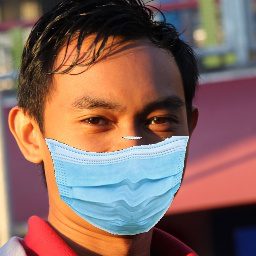

In [28]:
new_image

In [29]:
new_image=np.expand_dims(new_image,axis=0)

In [30]:
new_image.shape

(1, 256, 256, 3)

In [31]:
result=model.predict(new_image)

In [32]:
result

array([[0.11629451]], dtype=float32)

In [33]:
img1=load_img("/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Validation/female/00059_Mask.jpg",target_size=(256,256))

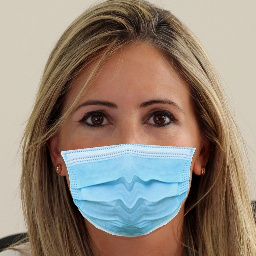

In [34]:
img1

In [35]:
img1=np.expand_dims(img1,axis=0)

In [36]:
img1.shape

(1, 256, 256, 3)

In [37]:
result=model.predict(img1)
result

array([[0.]], dtype=float32)